In [383]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import re
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [334]:
#Load Data
df= pd.read_csv('contestants.csv')


In [335]:
# Clean Data
# Seperate hometown into City and State to see most common States 
df['CITY'], df['STATE'] = df['Hometown'].str.split(',', 2).str[0:2].str

#Winner variable
winner = df[df['Together'].notnull()]
losers= df[df['Together'].isnull()]

Part 1- Data Exploration- Characterizing Bachelor Contestants

Mean age of Bachelor Contestant: 26.334719334719335
Oldest Contestant 36.0
Youngest Contestant 21.0


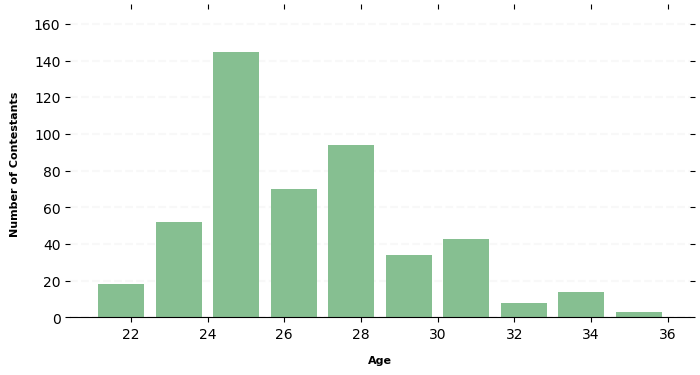

In [336]:
# Average Age of Bachelor Contestants
print("Mean age of Bachelor Contestant:", df['Age'].mean())
print("Oldest Contestant",df['Age'].max())
print("Youngest Contestant",df['Age'].min())

ax = df.hist(column='Age', bins=10, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.8)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=10, weight='bold', size=8)

    # Set y-axis label
    x.set_ylabel("Number of Contestants", labelpad=10, weight='bold', size=8)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [337]:
df['STATE'].value_counts()[0:10]

 California        77
 Texas             36
 Florida           36
 Illinois          27
 New York          17
 Utah              13
 New Jersey        13
 Colorado          13
 Pennsylvania      12
 North Carolina    12
Name: STATE, dtype: int64

In [338]:
df['CITY'].value_counts()[0:10]

Dallas            11
Los Angeles        8
Chicago            7
Seattle            7
Salt Lake City     6
Miami              6
Tampa              6
San Diego          6
Houston            5
New York           5
Name: CITY, dtype: int64

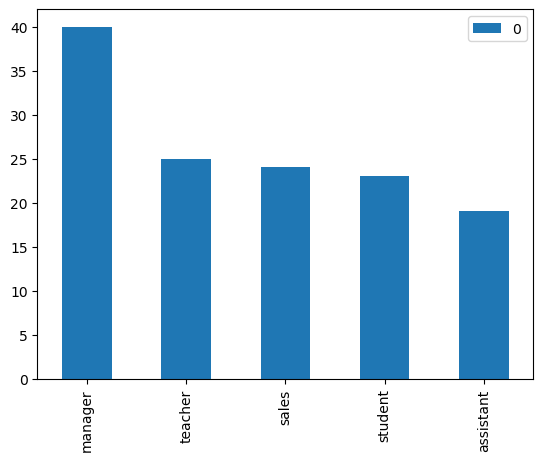

In [339]:
dfoc= df.copy()
dfoc= dfoc['Occupation'].str.lower()
dfoc= dfoc.to_frame()
dfoc= dfoc.Occupation.str.split(expand=True).stack().value_counts()[0:5]
dfoc= dfoc.to_frame()
dfoc.plot.bar()

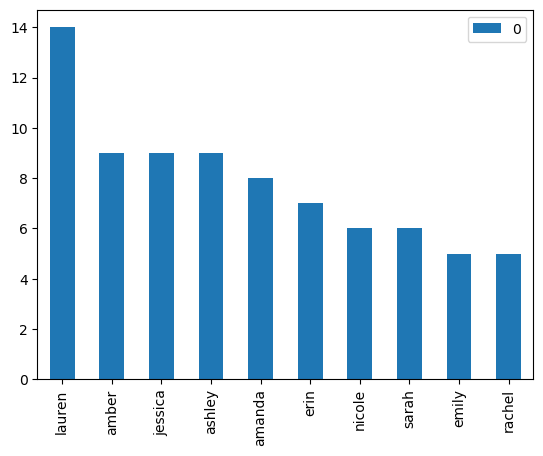

In [382]:
# Most common Names
dfname= df.copy()
dfname= dfname['Name'].str.lower()
dfname= dfname.to_frame()
dfname= dfname.Name.str.split(expand=True).stack().value_counts()[0:10]
dfname= dfname.to_frame()
dfname.plot.bar()



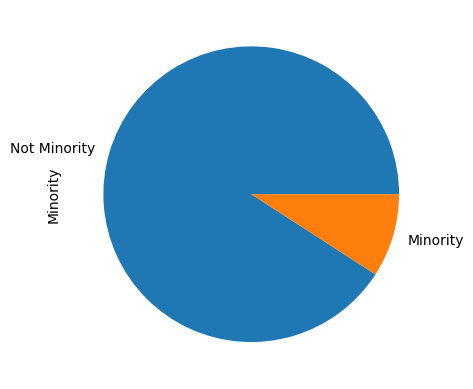

In [340]:
# 439 white contestants and only 43 minority contestants
df['Minority'].value_counts()
df2= df.copy()
df2= df.replace({0: 'Not Minority', 1: 'Minority'})
df2.Minority.value_counts().plot(kind='pie')

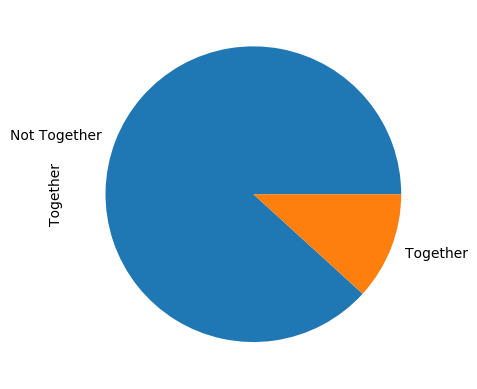

In [341]:

xl= df.replace({0: 'Not Together', 1: 'Together'})
xl['Together'].value_counts()
xl.Together.value_counts().plot(kind='pie')

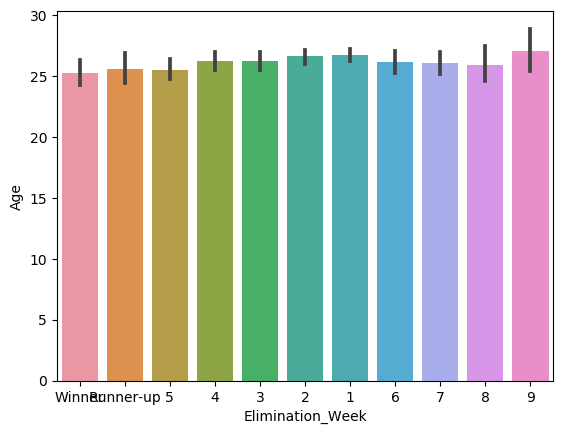

In [342]:
# Looking At Age
df['Age'].mean()

df.loc[df.Elimination_Week== 'Winner', 'Age'].mean()
#sns.jointplot(x='Elimination_Week', y='Age', data=df)

sns.barplot(x='Elimination_Week', y='Age', data=df)


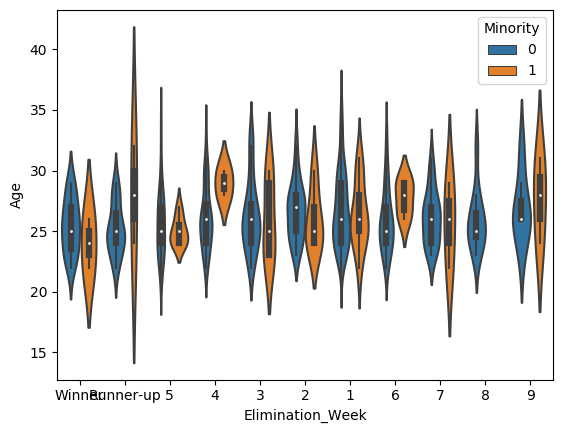

In [343]:
sns.violinplot(x='Elimination_Week', y='Age', data=df, hue='Minority')

In [345]:
# Characterizing the First Impression Rose- who is more likely to get it


print("Average Age of First Impression Rose Recipients", df.loc[df.First_Impression_Rose == 1, 'Age'].mean())
df.loc[df.First_Impression_Rose == 1, 'Hometown']
df.loc[df.First_Impression_Rose == 1].loc[df.Villain == 1]
df.loc[df.First_Impression_Rose == 1, 'Occupation']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == 'Runner-up']
df.loc[df.First_Impression_Rose == 1].loc[df.Minority == 1]

# Show first impression rose not a good indicator of who they will pick

Average Age of First Impression Rose Recipients 26.714285714285715


,Unnamed: 0,Age,Elimination_Week,Hometown,Name,Occupation,Outcome,Season,First_Impression_Rose,Villain,Minority,Together,CITY,STATE
313,5,29.0,7,"Ottawa, Ontario",Sharleen Joynt[12][13],Opera Singer,6,18,1.0,0.0,1,NaN,Ottawa,Ontario
400,7,31.0,9,"Dallas, Texas",Rachel Lindsay[8],Attorney,NaN,21,1.0,0.0,1,NaN,Dallas,Texas


In [385]:
# Part 3: Predicting a Winner- to predict a winner we will look at current season 11-23
# Bachelor Contestant Winners By Region
# Bachelor C- Average Age Gap 
df_p3= df.loc[df.Season > 10]
print("Mean age of Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].mean())
print("Youngest Winning Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].min())
print("Oldest Winning Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].max())
win= df.loc[df.Elimination_Week == 'Winner']



dfoc2= win['Occupation'].str.lower().to_frame()
dfoc2= dfoc2.Occupation.str.split(expand=True).stack().value_counts()[0:5]
dfoc2
win




Mean age of Bachelor Contestant: 25.666666666666668
Youngest Winning Bachelor Contestant: 22.0
Oldest Winning Bachelor Contestant: 29.0


,Unnamed: 0,Age,Elimination_Week,Hometown,Name,Occupation,Outcome,Season,First_Impression_Rose,Villain,Minority,Together,CITY,STATE
0,0,23.0,Winner,"Chanute, Kansas",Amanda Marsh,Event Planner,NaN,1,NaN,NaN,0,0.0,Chanute,Kansas
25,0,27.0,Winner,"Gloucester, New Jersey",Helene Eksterowicz,School Psychologist,NaN,2,NaN,NaN,0,0.0,Gloucester,New Jersey
50,0,22.0,Winner,"Huntington Beach, California",Jessica Bowlin,Student,NaN,5,NaN,0.0,0,0.0,Huntington Beach,California
75,0,24.0,Winner,"Pembroke Pines, Florida",Jennifer Wilson,Teacher,NaN,9,NaN,0.0,0,0.0,Pembroke Pines,Florida
102,0,26.0,Winner,"San Francisco, California",Tessa Horst,Social Worker,NaN,10,0.0,NaN,0,0.0,San Francisco,California
152,0,22.0,Winner,"Malibu, California",Shayna Lamas[1],Actress,NaN,12,0.0,NaN,1,0.0,Malibu,California
177,0,25.0,Winner,"Dallas, Texas",Melissa Rycroft[1],Sales Representative,NaN,13,0.0,NaN,0,0.0,Dallas,Texas
202,0,23.0,Winner,"Geneva, Florida",Vienna Girardi[1][2],Marketing Representative,NaN,14,0.0,1.0,0,0.0,Geneva,Florida
227,0,25.0,Winner,"Morgantown, West Virginia",Emily Maynard[5],Children's Hospital Event Planner,NaN,15,0.0,0.0,0,0.0,Morgantown,West Virginia
257,0,28.0,Winner,"Scottsdale, Arizona",Courtney Robertson[3][4],Model,NaN,16,0.0,1.0,0,0.0,Scottsdale,Arizona


In [391]:
df.loc[df.Season > 10].loc[df.Minority==0]
win['Minority'].value_counts()

0    15
1     2
Name: Minority, dtype: int64

In [ ]:
** M

In [298]:

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

KeyError: 'state'